In [98]:
#Фруктин Артём РТ5-61Б
# Задача №3.
# Для заданного набора данных произведите масштабирование данных 
# (для одного признака) и преобразование категориальных признаков 
# в количественные двумя способами (label encoding, one hot encoding) для одного признака. 
# Какие методы Вы использовали для решения задачи и почему?

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [100]:
data = pd.read_csv('toy_dataset.csv')


In [101]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [102]:
data.shape

(150000, 6)

In [103]:
data.isna().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

кодируем ohе. так как значения всего 2, это оптимально

In [104]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [105]:
data = pd.get_dummies(data, columns=['Gender'])

In [106]:
data.head()

,Number,City,Age,Income,Illness,Gender_Female,Gender_Male
0,1,Dallas,41,40367.0,No,False,True
1,2,Dallas,54,45084.0,No,False,True
2,3,Dallas,42,52483.0,No,False,True
3,4,Dallas,40,40941.0,No,False,True
4,5,Dallas,46,50289.0,No,False,True


Кодируем лэйбл энкодером. Это не оптимальный способ, так как значения разные и могут на порядок отличаться, из-за этого могут появиться ложные зависимости в данных, так как при обучении модели будут больше влиять бОльшие значения

In [107]:
np.unique(data['City'])

array(['Austin', 'Boston', 'Dallas', 'Los Angeles', 'Mountain View',
       'New York City', 'San Diego', 'Washington D.C.'], dtype=object)

In [108]:
city_column = LabelEncoder().fit_transform(data['City'])
np.unique(city_column)

array([0, 1, 2, 3, 4, 5, 6, 7])

Отшкалируем данные в промежуток от 0 до 1. Это важно, потому что модель будет работать с данными в небольшом промежутке, и будет делать лучшие предсказания.

In [109]:
scaler = MinMaxScaler()

In [110]:
data['Income_scaled'] = scaler.fit_transform(data[['Income']])

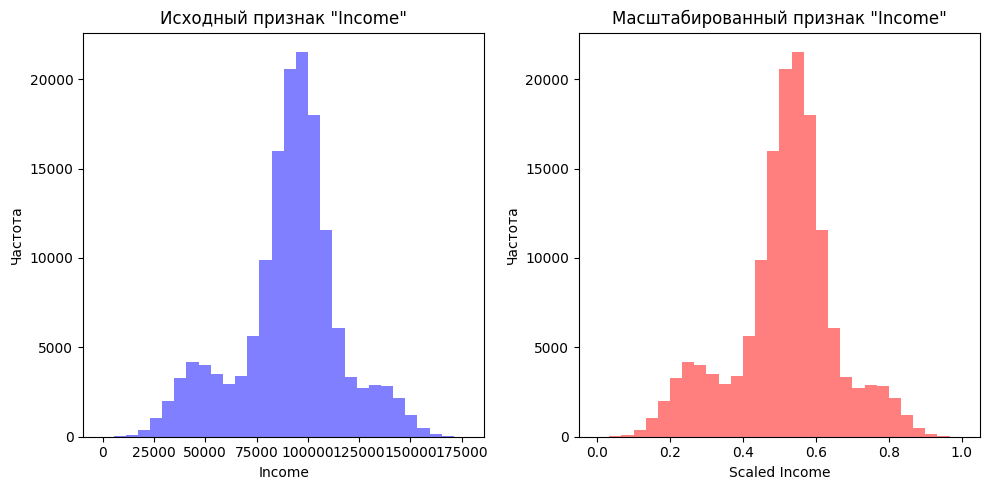

In [111]:
# Гистограмма исходного признака 'Income'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(data['Income'], bins=30, color='blue', alpha=0.5)
plt.title('Исходный признак "Income"')
plt.xlabel('Income')
plt.ylabel('Частота')

# Гистограмма масштабированного признака 'Income'
plt.subplot(1, 2, 2)
plt.hist(data['Income_scaled'], bins=30, color='red', alpha=0.5)
plt.title('Масштабированный признак "Income"')
plt.xlabel('Scaled Income')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


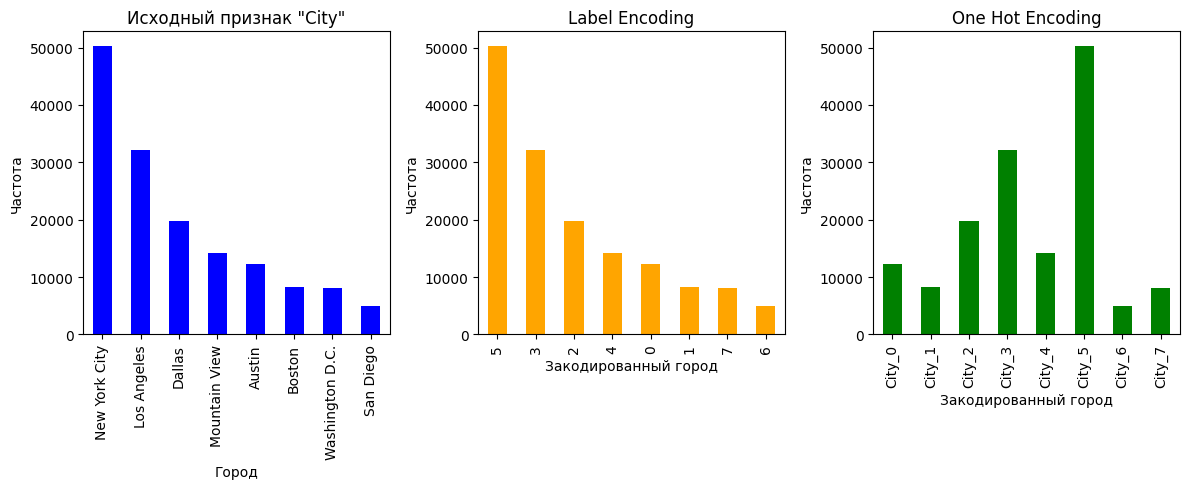

In [112]:
# Label Encoding
label_encoder = LabelEncoder()
data['City_label_encoded'] = label_encoder.fit_transform(data['City'])

one_hot_encoder = OneHotEncoder(sparse_output=False)
city_encoded = one_hot_encoder.fit_transform(data[['City']])
city_encoded_df = pd.DataFrame(city_encoded, columns=[f'City_{i}' for i in range(city_encoded.shape[1])])
data = pd.concat([data, city_encoded_df], axis=1)


# Гистограмма исходного категориального признака 'City'
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
data['City'].value_counts().plot(kind='bar', color='blue')
plt.title('Исходный признак "City"')
plt.xlabel('Город')
plt.ylabel('Частота')

# Применение LabelEncoder
plt.subplot(1, 3, 2)
label_encoded_counts = data['City_label_encoded'].value_counts()
label_encoded_counts.plot(kind='bar', color='orange')
plt.title('Label Encoding')
plt.xlabel('Закодированный город')
plt.ylabel('Частота')

# Применение OneHotEncoder
plt.subplot(1, 3, 3)
one_hot_encoded_counts = data.iloc[:, -len(label_encoded_counts):].sum()
one_hot_encoded_counts.plot(kind='bar', color='green')
plt.title('One Hot Encoding')
plt.xlabel('Закодированный город')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

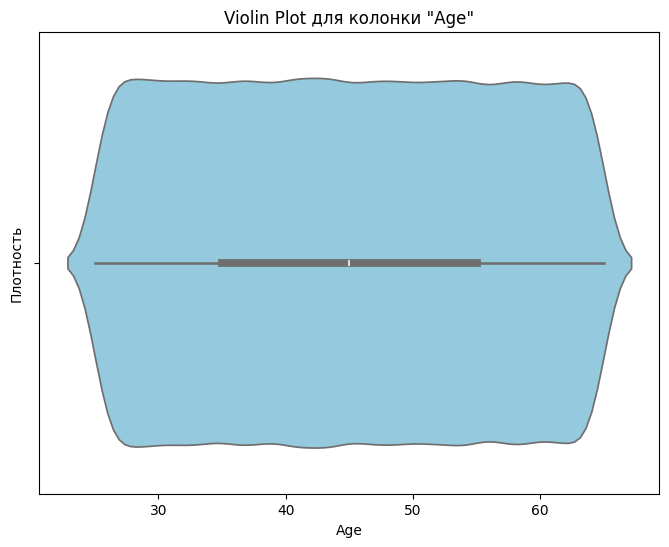

In [113]:
# Скрипичная диаграмма по признаку age
column_name = 'Age'

plt.figure(figsize=(8, 6))
sns.violinplot(x=data[column_name], color='skyblue')
plt.title(f'Violin Plot для колонки "{column_name}"')
plt.xlabel(column_name)
plt.ylabel('Плотность')
plt.show()
